In [1]:
! pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [3]:
tf.random.set_seed(100)

In [4]:
# suicide_master = pd.read_csv('/content/sample_data/suicide_master.csv')

suicide_master = pd.read_csv('/content/suicide_master.csv')

In [5]:
#Changing the type of the year variable from numeric to string

suicide_master['year'] = suicide_master['year'].astype(int)

suicide_master['year'] = suicide_master['year'].astype(str)

In [6]:
# Drop the column suicide_no as this column is used to predict suicide rates

sm_1 = suicide_master.drop(columns=['suicides_no'])

#Drop the suicide cluster column to see how this affects the model

sm_2 = sm_1.drop(columns=['suicide_cluster'])

In [7]:
# Re - identifying the numeric variables

# Identifyig the numeric variables

numeric_cols = suicide_master.select_dtypes(include = ['number']).columns.values.tolist()

# numeric.remove('Id')

numeric_cols

['suicides_no',
 'population',
 'suicidesper100k',
 'gdp_for_year',
 'gdp_per_capita',
 'Compensation of employees',
 'Unemployment(% of total labor force)',
 'Labor force strength',
 'Life expectancy',
 'suicide_cluster']

In [8]:
numeric_cols.remove('suicides_no')

numeric_cols.remove('suicidesper100k')

numeric_cols

['population',
 'gdp_for_year',
 'gdp_per_capita',
 'Compensation of employees',
 'Unemployment(% of total labor force)',
 'Labor force strength',
 'Life expectancy',
 'suicide_cluster']

In [9]:
numeric_cols_2 = numeric_cols

numeric_cols_2.remove('suicide_cluster')

numeric_cols_2

['population',
 'gdp_for_year',
 'gdp_per_capita',
 'Compensation of employees',
 'Unemployment(% of total labor force)',
 'Labor force strength',
 'Life expectancy']

In [10]:
# Re-identifying the  categoricl variables

cat_cols = suicide_master.select_dtypes(include = ['object']).columns.values.tolist()

cat_cols


['country', 'year', 'sex', 'age', 'generation']

In [11]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

# sm_1[numeric_cols] = rb_scaler.fit_transform(sm_1[numeric_cols])

sm_2[numeric_cols] = rb_scaler.fit_transform(sm_2[numeric_cols_2])

In [12]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()

for c in cat_cols :


#  sm_1[c] = l_encoder.fit_transform(sm_1[c])

   sm_2[c] = l_encoder.fit_transform(sm_2[c])

In [13]:
# sm_data.info()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(sm_2.drop(columns=['suicidesper100k']), sm_2['suicidesper100k'], test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape

((5829, 12), (2499, 12))

In [16]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [18]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=600)

Epoch 1/600
46/46 [==============================] - 1s 12ms/step - loss: 73.0495 - val_loss: 87.4293
Epoch 2/600
46/46 [==============================] - 0s 5ms/step - loss: 72.1283 - val_loss: 94.8460
Epoch 3/600
46/46 [==============================] - 0s 5ms/step - loss: 74.2597 - val_loss: 88.6055
Epoch 4/600
46/46 [==============================] - 0s 6ms/step - loss: 72.8227 - val_loss: 86.5626
Epoch 5/600
46/46 [==============================] - 0s 6ms/step - loss: 72.1143 - val_loss: 89.3228
Epoch 6/600
46/46 [==============================] - 0s 6ms/step - loss: 72.3042 - val_loss: 87.7275
Epoch 7/600
46/46 [==============================] - 0s 7ms/step - loss: 72.3093 - val_loss: 92.4330
Epoch 8/600
46/46 [==============================] - 0s 7ms/step - loss: 73.3449 - val_loss: 90.2712
Epoch 9/600
46/46 [==============================] - 0s 7ms/step - loss: 72.3658 - val_loss: 86.5127
Epoch 10/600
46/46 [==============================] - 0s 7ms/step - loss: 72.1295 - val_lo

In [19]:
losses = pd.DataFrame(model.history.history)

<Axes: >

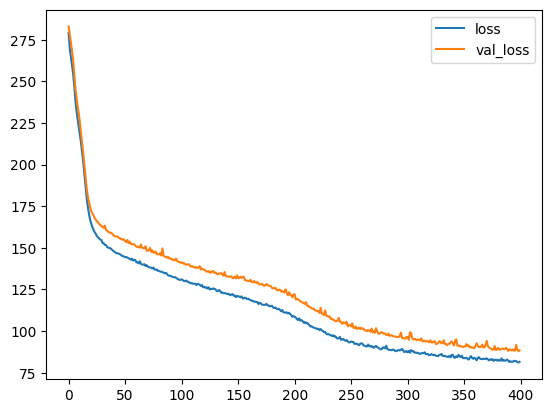

In [ ]:
losses.plot()

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [21]:
predictions_train = model.predict(X_train)

183/183 [==============================] - 0s 2ms/step


In [22]:
predictions = model.predict(X_test)

predictions

79/79 [==============================] - 0s 2ms/step


array([[1.6649365e-03],
       [1.0015163e+01],
       [4.9762478e+00],
       ...,
       [2.7752111e+00],
       [1.3252923e+01],
       [2.9496057e+00]], dtype=float32)

In [23]:
y_test

5278     0.00
8084     3.60
6004     9.59
2589     1.96
5308    17.31
        ...  
7445     7.03
376     18.90
7987     4.10
228      9.23
5824    12.03
Name: suicidesper100k, Length: 2499, dtype: float64

In [24]:
print(r2_score(y_train,predictions_train))

print(r2_score(y_test,predictions))

0.7716180117012928
0.7177345706857894


In [25]:
print(mean_absolute_error(y_train,predictions_train))

print(np.sqrt(mean_squared_error(y_train,predictions_train)))

print(mean_absolute_error(y_test,predictions))

print(np.sqrt(mean_squared_error(y_test,predictions)))

4.613030795594966
7.446549167128013
5.0890020351631255
8.451400952275636


#### Improving the model

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [27]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
183/183 [==============================] - 2s 7ms/step - loss: 61.9214 - val_loss: 76.7420
Epoch 2/600
183/183 [==============================] - 1s 5ms/step - loss: 62.0451 - val_loss: 105.6399
Epoch 3/600
183/183 [==============================] - 1s 5ms/step - loss: 61.4566 - val_loss: 73.8407
Epoch 4/600
183/183 [==============================] - 1s 5ms/step - loss: 61.1137 - val_loss: 80.8073
Epoch 5/600
183/183 [==============================] - 1s 5ms/step - loss: 59.5624 - val_loss: 71.7643
Epoch 6/600
183/183 [==============================] - 1s 6ms/step - loss: 59.1411 - val_loss: 83.9252
Epoch 7/600
183/183 [==============================] - 1s 5ms/step - loss: 59.2471 - val_loss: 71.7775
Epoch 8/600
183/183 [==============================] - 1s 5ms/step - loss: 57.8377 - val_loss: 71.9156
Epoch 9/600
183/183 [==============================] - 1s 5ms/step - loss: 59.1691 - val_loss: 71.8825
Epoch 10/600
183/183 [==============================] - 1s 5ms/step - lo

<Axes: >

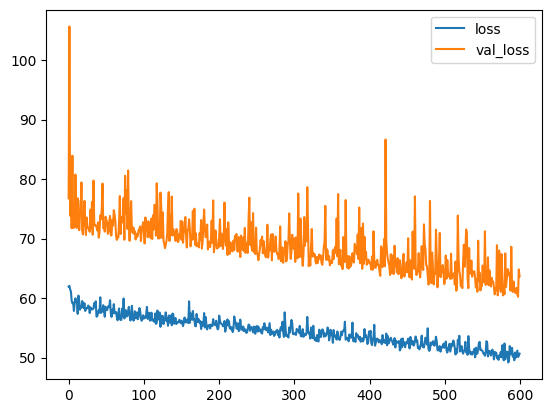

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [29]:
prediction_train = model.predict(X_train)

predictions = model.predict(X_test)



79/79 [==============================] - 0s 2ms/step


In [30]:
print(mean_absolute_error(y_train,predictions_train))

print(np.sqrt(mean_squared_error(y_train,predictions_train)))

print(mean_absolute_error(y_test,predictions))

print(np.sqrt(mean_squared_error(y_test,predictions)))

4.613030795594966
7.446549167128013
4.9965510925515835
7.977618232185147


In [31]:
print(r2_score(y_train,predictions_train))

print(r2_score(y_test,predictions))

0.7716180117012928
0.7484949107564287


#### Adding DropOuts

In [32]:
from tensorflow.keras.layers import Dropout

In [33]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=20,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam')

In [34]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
183/183 [==============================] - 4s 5ms/step - loss: 276.1244 - val_loss: 245.1673
Epoch 2/600
183/183 [==============================] - 1s 4ms/step - loss: 234.6148 - val_loss: 222.8983
Epoch 3/600
183/183 [==============================] - 1s 4ms/step - loss: 219.1235 - val_loss: 206.8741
Epoch 4/600
183/183 [==============================] - 1s 4ms/step - loss: 198.1685 - val_loss: 190.2588
Epoch 5/600
183/183 [==============================] - 1s 4ms/step - loss: 185.6684 - val_loss: 182.3795
Epoch 6/600
183/183 [==============================] - 1s 4ms/step - loss: 177.6551 - val_loss: 166.8978
Epoch 7/600
183/183 [==============================] - 1s 4ms/step - loss: 171.2182 - val_loss: 167.6450
Epoch 8/600
183/183 [==============================] - 1s 4ms/step - loss: 166.8248 - val_loss: 168.0705
Epoch 9/600
183/183 [==============================] - 1s 4ms/step - loss: 163.6968 - val_loss: 163.6751
Epoch 10/600
183/183 [==============================] -

<Axes: >

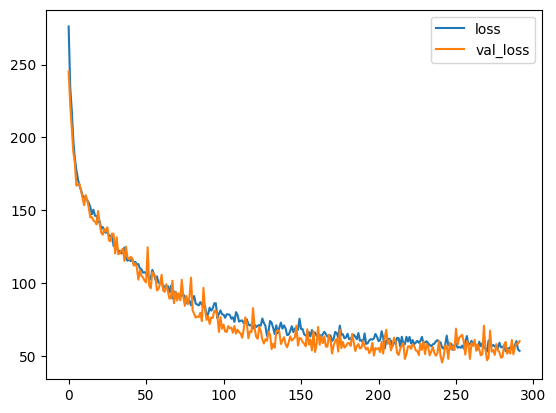

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
predictions_train = model.predict(X_train)

predictions = model.predict(X_test)




79/79 [==============================] - 0s 2ms/step


In [37]:
print(mean_absolute_error(y_train,predictions_train))

print(np.sqrt(mean_squared_error(y_train,predictions_train)))

print(mean_absolute_error(y_test,predictions))

print(np.sqrt(mean_squared_error(y_test,predictions)))

4.509601834150014
6.834750456255299
4.899933323600665
7.7583287740364515


In [38]:
print(r2_score(y_train,predictions_train))

print(r2_score(y_test,predictions))

0.8076035509670079
0.7621316619750723
